In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/data.yaml
/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/valid/labels/Not-perfect-welding-images_10_jpeg_jpg.rf.938705132c676bde86605b449fbfd55e.txt
/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/valid/labels/Screenshot-2022-12-05-223639_jpeg.rf.86f504360592eab360a0ad9923d695ab.txt
/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/valid/labels/crack-welding-images_21_jpeg_jpg.rf.a8fe58377f24d954a14e75c731321a8b.txt
/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/valid/labels/d18b341f-e637a315-c21_jpg.rf.12173f7ad5047c3c89e3bee036329565.txt
/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukmaadhiwijaya/welding-defect-object-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/welding-defect-object-detection


In [3]:
!pip install ultralytics

import shutil
import matplotlib.pyplot as plt
import cv2
import random
from IPython.display import Image, display
import pandas as pd
import seaborn as sns
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 17.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import wandb



In [5]:
root_dir = "/kaggle/input/welding-defect-object-detection"
v1_dir = os.path.join(root_dir, 'The Welding Defect Dataset/The Welding Defect Dataset')
v2_dir = os.path.join(root_dir, 'The Welding Defect Dataset - v2/The Welding Defect Dataset - v2')
# 確保 YOLOv8 的數據目錄存在
os.makedirs('yolov8/data/welding_v1', exist_ok=True)
os.makedirs('yolov8/data/welding_v2', exist_ok=True)

In [6]:
#顯示圖片的函數
def display_images(image_dir, num_images=9):
    images = os.listdir(image_dir)
    sample_images = random.sample(images, num_images)
    plt.figure(figsize=(15, 15))
    for i, image_name in enumerate(sample_images):
        image_path = os.path.join(image_dir, image_name)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
    plt.show()


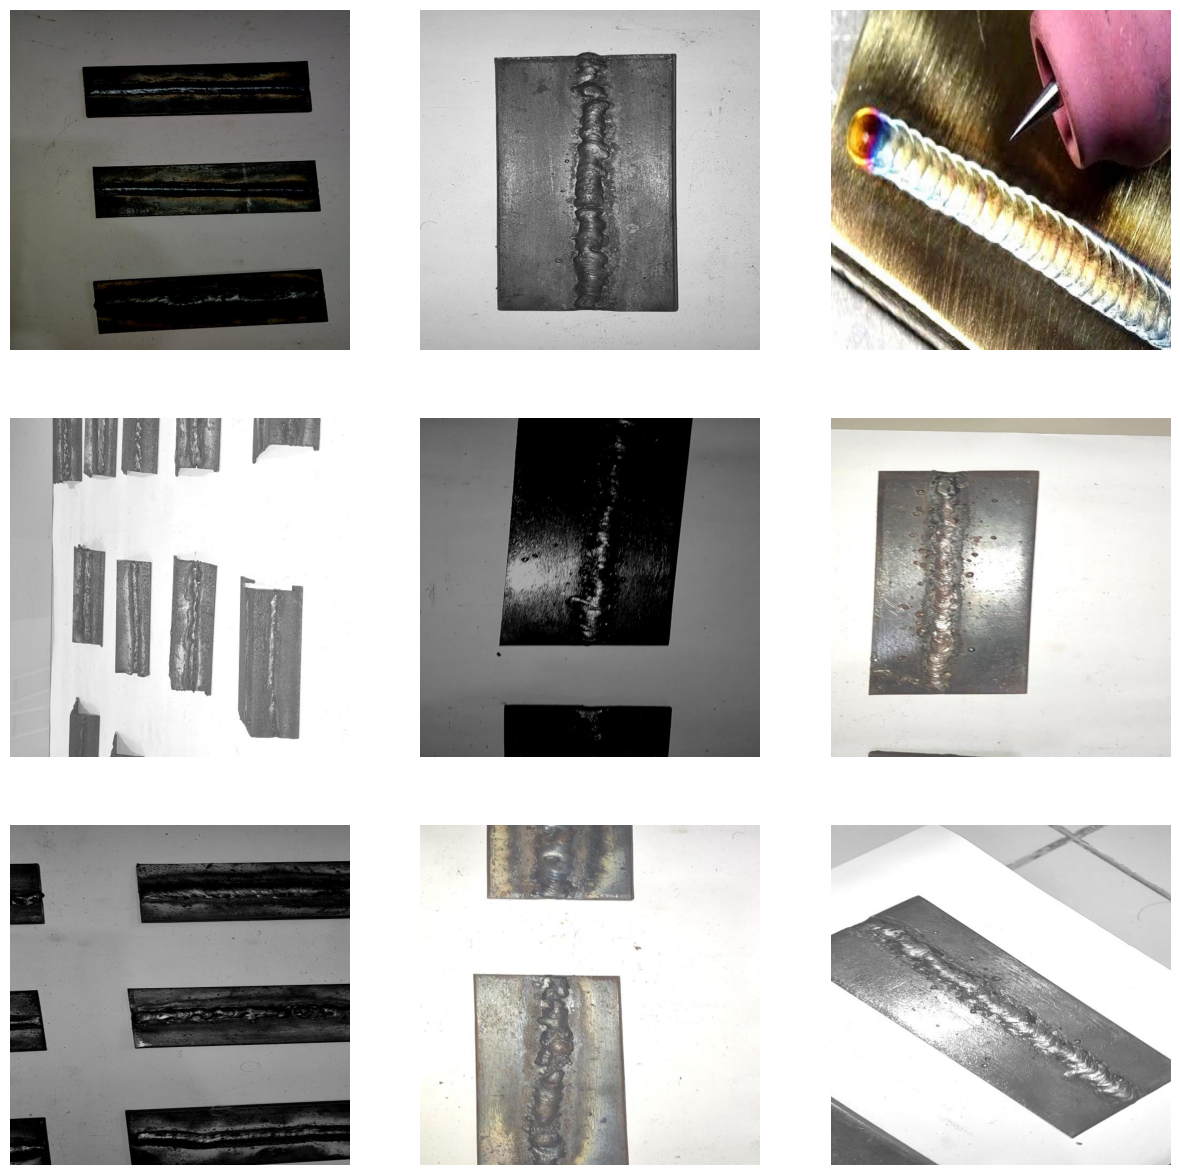

In [7]:
# 顯示一些訓練圖像
display_images(os.path.join(v1_dir, 'train/images'))


Displaying some training images from version 2:


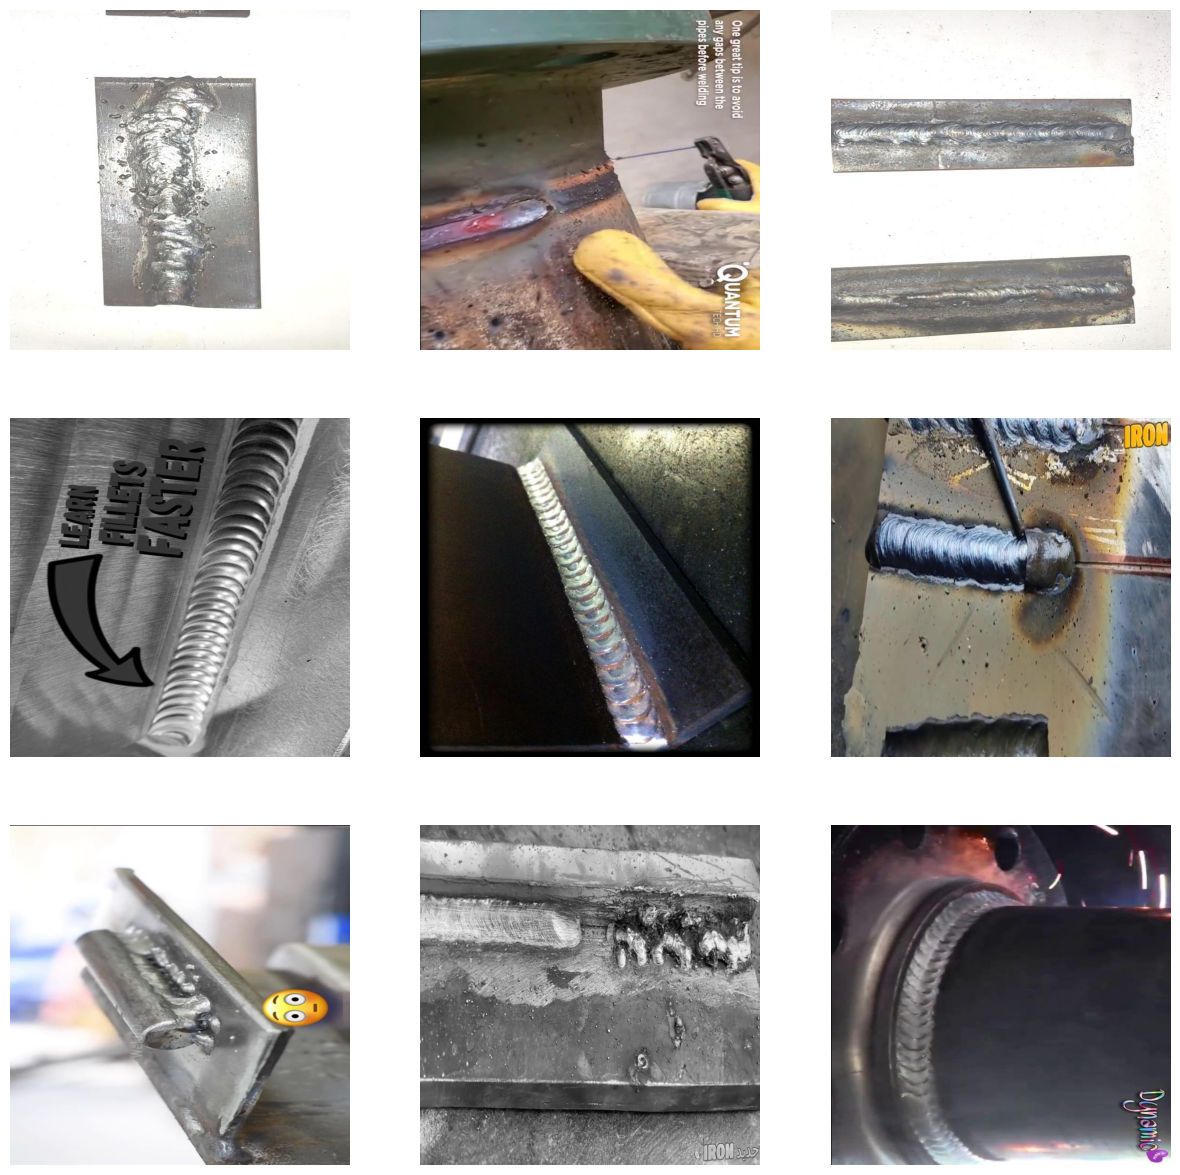

In [8]:
print("Displaying some training images from version 2:")
display_images(os.path.join(v2_dir, 'train/images'))

In [9]:
# 將資料集複製到 YOLOv8 目錄
def copy_dataset_to_yolo(src_dir, dest_dir):
    if os.path.exists(dest_dir):
        shutil.rmtree(dest_dir) #如果資料夾存在刪除它,確保是最新的資料夾
    shutil.copytree(src_dir, dest_dir)

# 複製版本 1 資料集 
copy_dataset_to_yolo(v1_dir, 'yolov8/data/welding_v1')
copy_dataset_to_yolo(v2_dir, 'yolov8/data/welding_v2')

In [10]:
# 更新 data.yaml 路徑
def update_data_yaml(data_yaml_path, base_dir):
    with open(data_yaml_path, 'r') as file:
        data_yaml = file.read()
    data_yaml = data_yaml.replace('../train/images', os.path.join(base_dir, 'train/images'))
    data_yaml = data_yaml.replace('../valid/images', os.path.join(base_dir, 'valid/images'))
    data_yaml = data_yaml.replace('../test/images', os.path.join(base_dir, 'test/images'))
    with open(data_yaml_path, 'w') as file:
        file.write(data_yaml)

update_data_yaml('yolov8/data/welding_v1/data.yaml', '/kaggle/working/yolov8/data/welding_v1')

update_data_yaml('yolov8/data/welding_v2/data.yaml', '/kaggle/working/yolov8/data/welding_v2')

# 列印並驗證更新後的 data.yaml 文件
def print_data_yaml(data_yaml_path):
    with open(data_yaml_path, 'r') as file:
        print(file.read())

print("Updated data.yaml for version 1:")
print_data_yaml('yolov8/data/welding_v1/data.yaml')

print("Updated data.yaml for version 2:")
print_data_yaml('yolov8/data/welding_v2/data.yaml')

Updated data.yaml for version 1:
train: /kaggle/working/yolov8/data/welding_v1/train/images
val: /kaggle/working/yolov8/data/welding_v1/valid/images
test: /kaggle/working/yolov8/data/welding_v1/test/images

nc: 3
names: ['Bad Weld', 'Good Weld', 'Defect']


Updated data.yaml for version 2:
train: /kaggle/working/yolov8/data/welding_v2/train/images
val: /kaggle/working/yolov8/data/welding_v2/valid/images
test: /kaggle/working/yolov8/data/welding_v2/test/images

nc: 3
names: ['Bad Weld', 'Good Weld', 'Defect']




In [11]:
# EDA 和預處理 
#這段程式碼的作用是 載入 YOLO 格式的標註檔案（labels）
#並轉換為 Pandas DataFrame，
#方便後續分析或處理。
def load_labels(label_dir):
    label_files = os.listdir(label_dir) # 取得標註檔案列表
    data = [] # 儲存標註資料
    for label_file in label_files:
        with open(os.path.join(label_dir, label_file), 'r') as file:
            lines = file.readlines() # 讀取標註文件的每一行
            for line in lines:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                data.append([label_file, class_id, x_center, y_center, width, height])
     # 將資料轉換成 DataFrame
    df = pd.DataFrame(data, columns=['file', 'class_id', 'x_center', 'y_center', 'width', 'height'])
    return df

v1_train_labels = load_labels(os.path.join(v1_dir, 'train/labels'))
v2_train_labels = load_labels(os.path.join(v2_dir, 'train/labels'))


In [12]:
v1_train_labels.head()

file  class_id  x_center  \
0  good_weld_vid1606_jpeg_jpg.rf.0380bddd8aacabeb...       1.0  0.889844   
1  good_weld_vid1606_jpeg_jpg.rf.0380bddd8aacabeb...       1.0  0.331250   
2  good_weld_vid1606_jpeg_jpg.rf.0380bddd8aacabeb...       1.0  0.664844   
3  SampleV2_2_mp4-45_jpg.rf.f2a431b74fa4963191b4d...       2.0  0.941406   
4  SampleV2_2_mp4-45_jpg.rf.f2a431b74fa4963191b4d...       1.0  0.507031   

   y_center     width    height  
0  0.476562  0.146875  0.425000  
1  0.514062  0.653125  0.315625  
2  0.838281  0.231250  0.268750  
3  0.159375  0.117188  0.091406  
4  0.433594  0.381250  0.104688

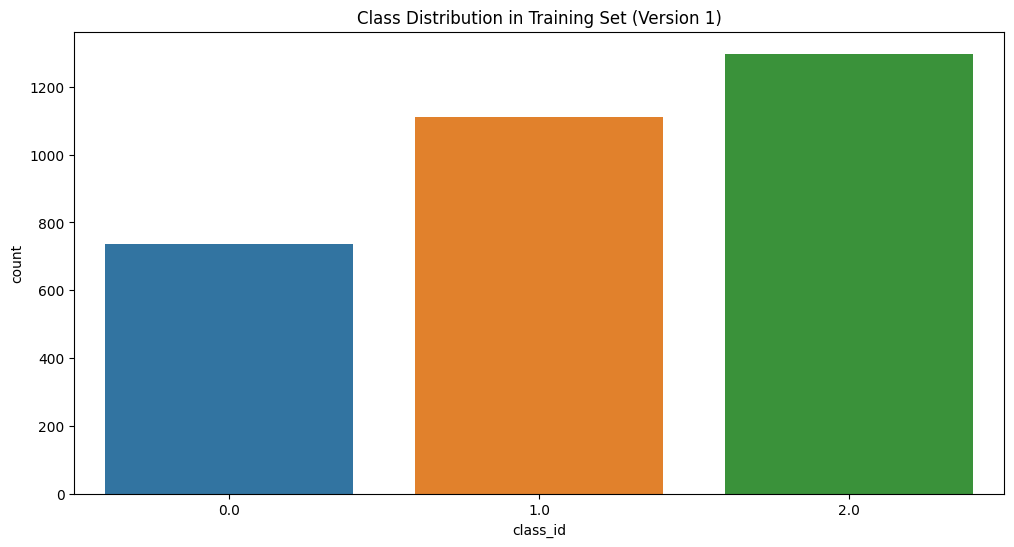

In [13]:
# 繪製類別分佈
plt.figure(figsize=(12, 6))
sns.countplot(data=v1_train_labels, x='class_id')
plt.title('Class Distribution in Training Set (Version 1)')
plt.show()

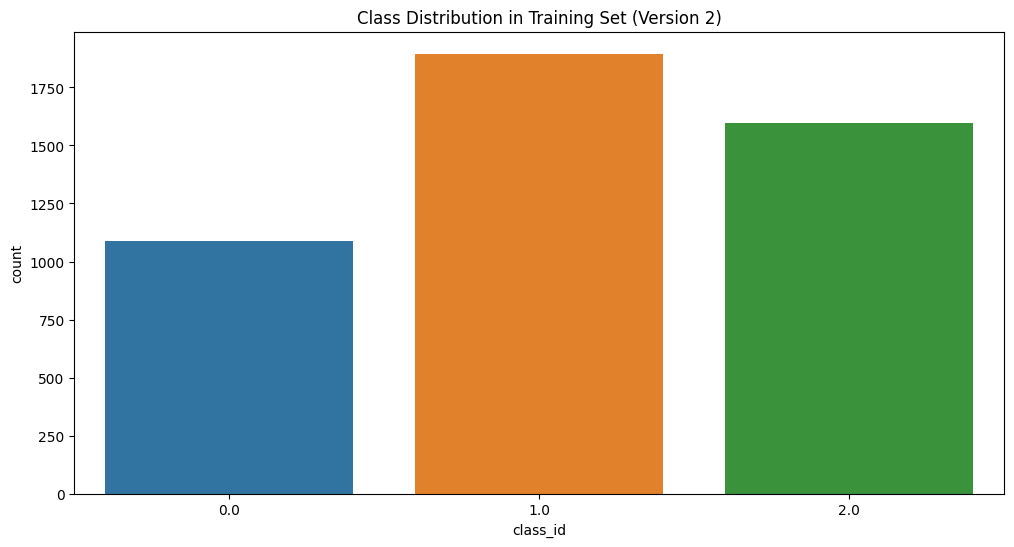

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=v2_train_labels, x='class_id')
plt.title('Class Distribution in Training Set (Version 2)')
plt.show()

In [15]:
# 使用增強(augmentation)和超參數(hyperparameter)調整訓練 YOLOv8 模型 
# 初始化模型

In [16]:
model_v1 = YOLO('yolov8m.pt')  # YOLOv8m (medium) model
model_v2 = YOLO('yolov8m.pt')  # YOLOv8m (medium) model

100%|██████████| 49.7M/49.7M [00:00<00:00, 272MB/s]


In [17]:
# 在版本 1 資料集上訓練模型
model_v1.train(data='/kaggle/working/yolov8/data/welding_v1/data.yaml', epochs=10, imgsz=640, batch=16, name='welding_v1_aug', 
               lr0=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,
               box=0.05, cls=0.5, iou=0.2, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, translate=0.1, scale=0.5, mosaic=1.0, mixup=0.5)

# 在版本 2 資料集上訓練模型
model_v2.train(data='/kaggle/working/yolov8/data/welding_v2/data.yaml', epochs=10, imgsz=640, batch=16, name='welding_v2_aug', 
               lr0=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,
               box=0.05, cls=0.5, iou=0.2, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, translate=0.1, scale=0.5, mosaic=1.0, mixup=0.5)

Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/yolov8/data/welding_v1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=welding_v1_aug, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.2, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/yolov8/data/welding_v1/train/labels... 839 images, 0 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:00<00:00, 969.12it/s] 

train: New cache created: /kaggle/working/yolov8/data/welding_v1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/yolov8/data/welding_v1/valid/labels... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<00:00, 1055.30it/s]

val: New cache created: /kaggle/working/yolov8/data/welding_v1/valid/labels.cache


Plotting labels to runs/detect/welding_v1_aug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/welding_v1_aug
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.33G    0.01424      3.269      1.841         21        640: 100%|██████████| 53/53 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]

                   all        176        573      0.192      0.337      0.134     0.0458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      6.29G    0.01428      2.616      1.833         13        640: 100%|██████████| 53/53 [00:26<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all        176        573      0.155      0.145     0.0664     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      6.29G    0.01467       2.54      1.894         45        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        176        573     0.0981      0.114     0.0492     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.44G    0.01371      2.367       1.81         33        640: 100%|██████████| 53/53 [00:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        176        573      0.214      0.253      0.162     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      6.36G    0.01368      2.325      1.811         15        640: 100%|██████████| 53/53 [00:29<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        176        573      0.314      0.407      0.254     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.31G    0.01286      2.201      1.698         28        640: 100%|██████████| 53/53 [00:30<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        176        573      0.411      0.419      0.309      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.36G    0.01238      2.128      1.681         24        640: 100%|██████████| 53/53 [00:30<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        176        573       0.39      0.498      0.358      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.38G    0.01213      1.989      1.629         26        640: 100%|██████████| 53/53 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        176        573      0.371      0.552      0.376      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      6.37G    0.01151      1.887      1.592         26        640: 100%|██████████| 53/53 [00:30<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        176        573      0.461      0.539      0.429      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.28G    0.01101      1.772      1.529         25        640: 100%|██████████| 53/53 [00:30<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        176        573      0.451      0.572      0.447      0.233



10 epochs completed in 0.095 hours.
Optimizer stripped from runs/detect/welding_v1_aug/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/welding_v1_aug/weights/best.pt, 52.0MB

Validating runs/detect/welding_v1_aug/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]


                   all        176        573      0.453      0.574      0.447      0.233
              Bad Weld         87        127      0.416      0.817      0.554      0.298
             Good Weld        119        253      0.578      0.743      0.636       0.35
                Defect         90        193      0.364      0.161      0.151     0.0502


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 11.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/welding_v1_aug
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/yolov8/data/welding_v2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=welding_v2_aug, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.2, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

train: Scanning /kaggle/working/yolov8/data/welding_v2/train/labels... 1619 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1619/1619 [00:01<00:00, 1099.49it/s]

train: New cache created: /kaggle/working/yolov8/data/welding_v2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/yolov8/data/welding_v2/valid/labels... 283 images, 0 backgrounds, 0 corrupt: 100%|██████████| 283/283 [00:00<00:00, 893.10it/s]

val: New cache created: /kaggle/working/yolov8/data/welding_v2/valid/labels.cache


Plotting labels to runs/detect/welding_v2_aug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/welding_v2_aug
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.86G    0.01431      3.209      1.952         11        640: 100%|██████████| 102/102 [01:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

                   all        283        802      0.165      0.328      0.132     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       6.9G    0.01519      2.721      2.061         10        640: 100%|██████████| 102/102 [00:58<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]

                   all        283        802      0.188      0.176     0.0883     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      6.79G    0.01517      2.663      2.079         11        640: 100%|██████████| 102/102 [00:58<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]

                   all        283        802      0.492      0.121     0.0872      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       6.9G    0.01447      2.509      2.011          4        640: 100%|██████████| 102/102 [00:58<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]

                   all        283        802      0.249      0.368      0.196      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      6.89G    0.01369      2.366      1.914          5        640: 100%|██████████| 102/102 [00:58<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]

                   all        283        802      0.272       0.35      0.218     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.91G    0.01324      2.266      1.869         10        640: 100%|██████████| 102/102 [00:58<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]

                   all        283        802      0.326      0.457       0.29      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.92G     0.0128      2.124      1.796         12        640: 100%|██████████| 102/102 [00:58<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]

                   all        283        802      0.441      0.468      0.392      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.91G    0.01222      1.995      1.742          3        640: 100%|██████████| 102/102 [00:59<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]

                   all        283        802      0.392      0.545      0.408      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      6.92G    0.01174      1.912      1.692          4        640: 100%|██████████| 102/102 [00:58<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

                   all        283        802       0.47      0.609      0.498      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.88G     0.0112      1.783      1.636          5        640: 100%|██████████| 102/102 [00:58<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]

                   all        283        802      0.577      0.599      0.538      0.272



10 epochs completed in 0.182 hours.
Optimizer stripped from runs/detect/welding_v2_aug/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/welding_v2_aug/weights/best.pt, 52.0MB

Validating runs/detect/welding_v2_aug/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]


                   all        283        802      0.577      0.599      0.538      0.272
              Bad Weld        141        194      0.519       0.83      0.654      0.368
             Good Weld        175        335       0.63      0.752       0.67      0.348
                Defect        128        273      0.581      0.213      0.289     0.0998


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 11.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/welding_v2_aug


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ee41da5abc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

Displaying results from model trained on version 1 with augmentation:

image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/Spatters-welding-images_30_jpeg_jpg.rf.ac1f61755f14395f6e5da156c7fd043f.jpg: 640x640 (no detections), 36.9ms
Speed: 2.9ms preprocess, 36.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


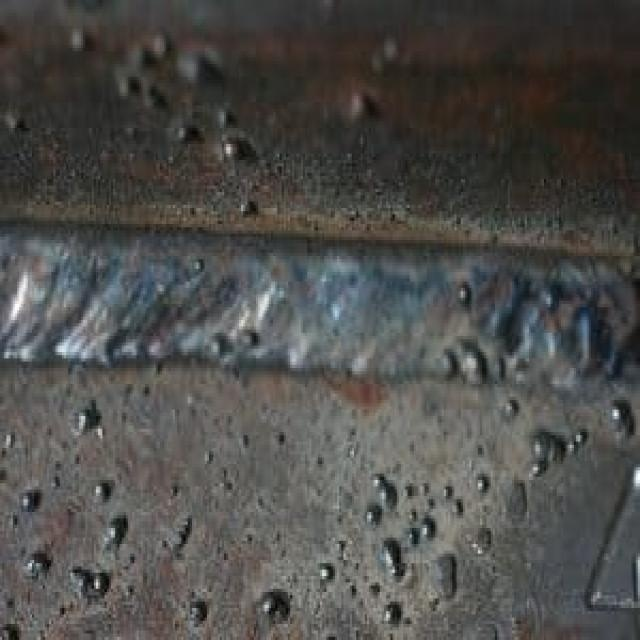


image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/porosity-worm-hole-weld-defect-welding-process-flux-cored-arc-fcaw-204492534_jpeg_jpg.rf.c5201d1c888e3ffa1fded39930503d32.jpg: 640x640 (no detections), 36.9ms
Speed: 2.7ms preprocess, 36.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


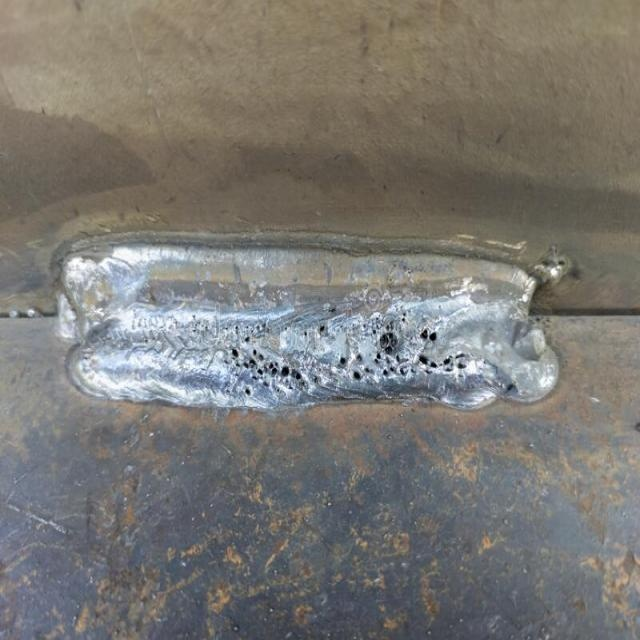


image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/295992d6-f617b725-c1_png_jpg.rf.5f645e13f1695df588b0644ca9702c43.jpg: 640x640 (no detections), 36.9ms
Speed: 1.3ms preprocess, 36.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


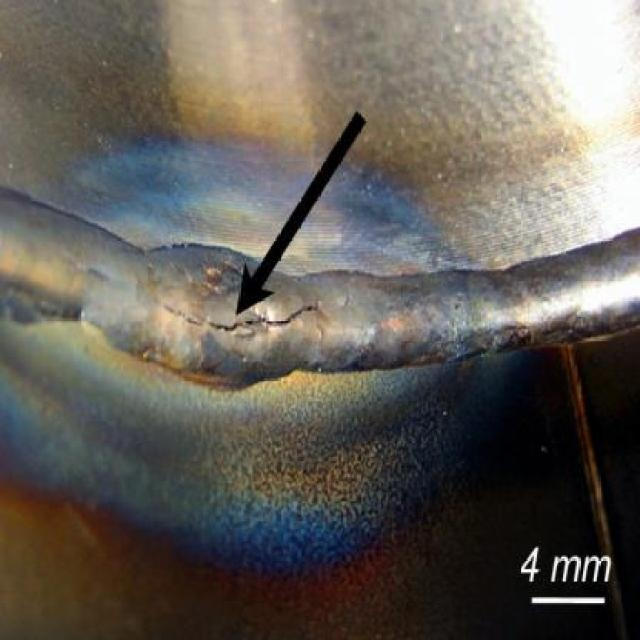


image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/good_weld_vid529_jpeg_jpg.rf.4dc697dcd18f7c7de001311bb1f845e6.jpg: 640x640 1 Good Weld, 36.9ms
Speed: 1.3ms preprocess, 36.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


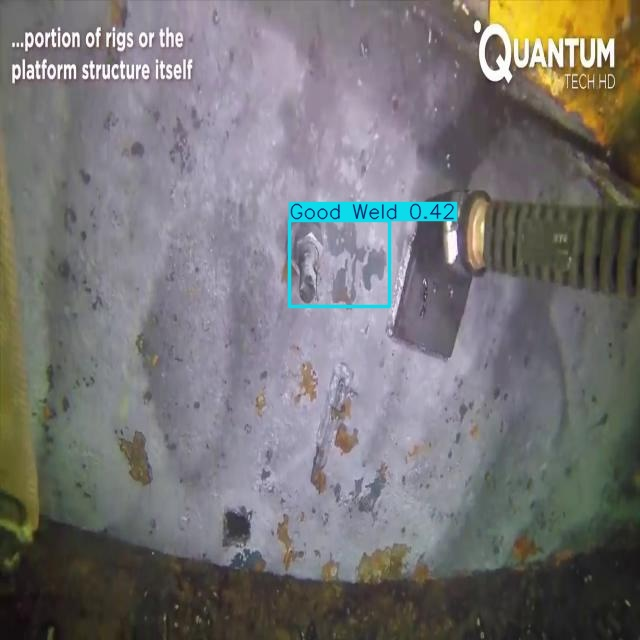


image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/1aa4b44c-d01b8a11-Hot-crack_jpg.rf.57393ca7936f061ca5991481b2b5c485.jpg: 640x640 (no detections), 28.7ms
Speed: 1.2ms preprocess, 28.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


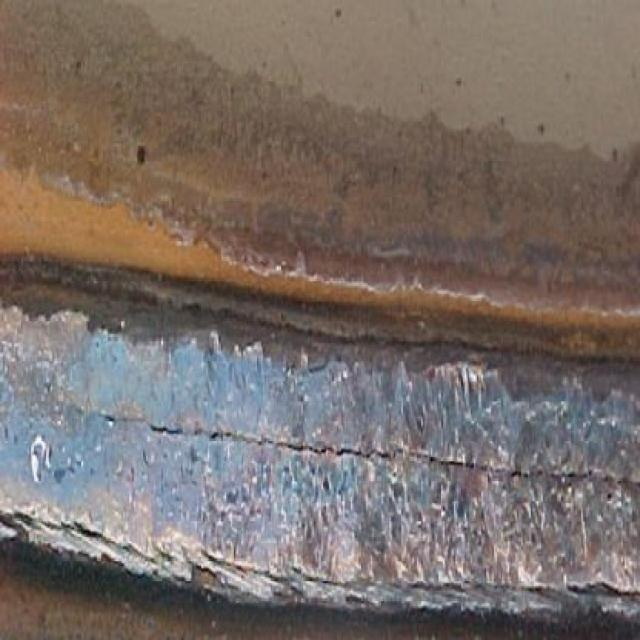

Displaying results from model trained on version 2 with augmentation:

image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/bad_weld_vid84_jpeg_jpg.rf.f148c4898a835b73a3eb087d905ed8f3.jpg: 640x640 1 Good Weld, 23.5ms
Speed: 1.5ms preprocess, 23.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


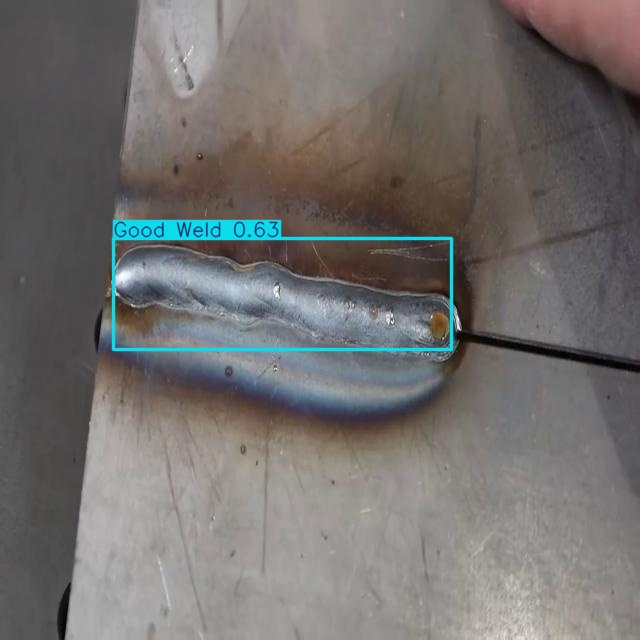


image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/SampleV2_1_mp4-60_jpg.rf.40f4a4094130e65b1a801b49fefc5d01.jpg: 640x640 3 Good Welds, 23.5ms
Speed: 1.3ms preprocess, 23.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


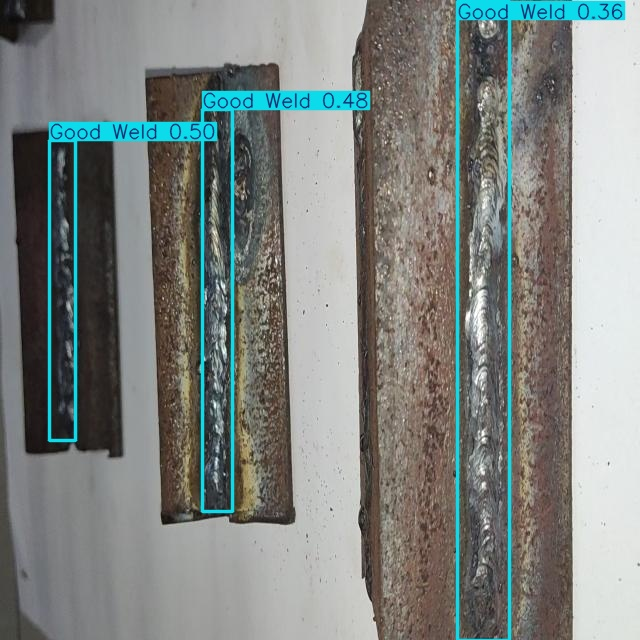


image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/good-tig-welds_3_jpeg.rf.c6afd4c75c9f0f8866e1d58bb2a2ae0d.jpg: 640x640 1 Bad Weld, 1 Good Weld, 23.5ms
Speed: 1.3ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


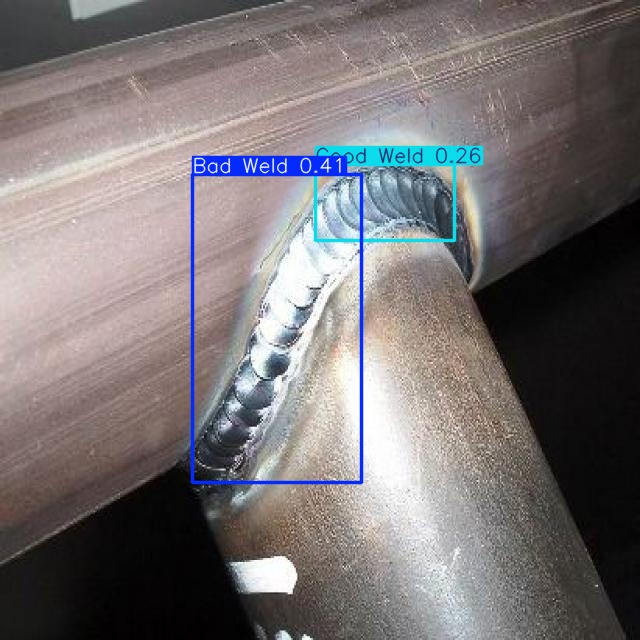


image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/bad_weld_vid397_jpeg_jpg.rf.6aacbe170c5956e56b1024f24d60c60c.jpg: 640x640 1 Bad Weld, 1 Good Weld, 23.5ms
Speed: 1.2ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


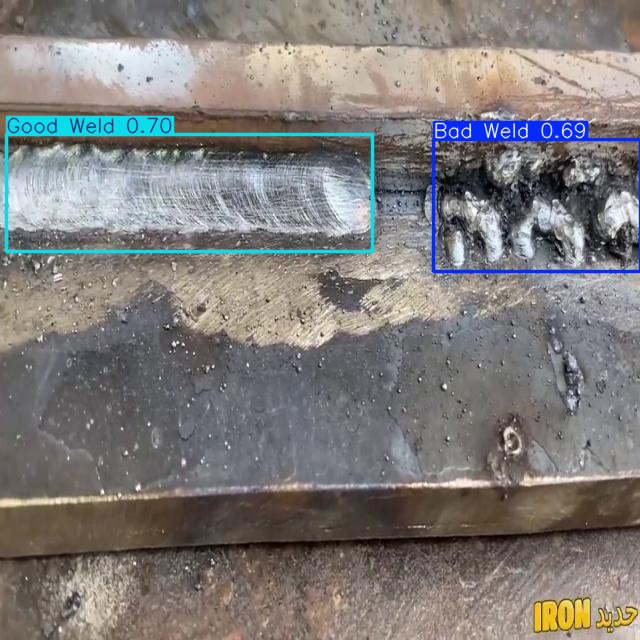


image 1/1 /kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/crack-welding-images_17_jpeg_jpg.rf.ff570716da313da84983bc629ae7e331.jpg: 640x640 1 Bad Weld, 23.5ms
Speed: 1.4ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


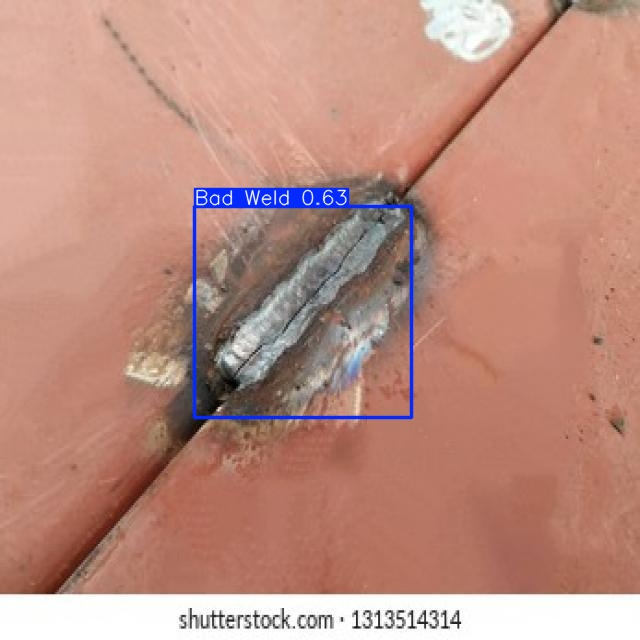

In [18]:
# 評估模型並顯示結果
def display_results(model, img_dir, num_images=5):
    images = os.listdir(img_dir)
    sample_images = random.sample(images, num_images)
    save_dir = 'runs/detect/exp'
    os.makedirs(save_dir, exist_ok=True)

    for image_name in sample_images:
        image_path = os.path.join(img_dir, image_name)
        results = model(image_path)

        for result in results:
            result.plot(save=True, filename=os.path.join(save_dir, os.path.basename(result.path)))
            result_image_path = os.path.join(save_dir, os.path.basename(result.path))
            display(Image(filename=result_image_path))

print("Displaying results from model trained on version 1 with augmentation:")
display_results(model_v1, os.path.join(v1_dir, 'test/images'))

print("Displaying results from model trained on version 2 with augmentation:")
display_results(model_v2, os.path.join(v2_dir, 'test/images'))
    

In [19]:
#訓練只用了10 epoches,如果數量越多,成效越好